### Factors Driving Life Expectancy : Do immunization matters?

https://docs.google.com/document/d/1s9UBMcbDzsvuNH2x-BzXwYZHOJOFGHXu5IDkexAnjGo/edit?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os 


from library.sb_utils import save_file

In [2]:
sns.set()
sns.set_context("notebook")

#### Importing Data

In [3]:
df1 = pd.read_csv("../data/life_exp_Zero_Nan.csv")

In [4]:
df1.head(2)

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


In [5]:
df1.shape

(2938, 22)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2090 non-null   float64
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2327 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          1955 non-null   float64
 10  BMI                              2904 non-null   float64
 11  under_five_deaths                2153 non-null   float64
 12  Polio               

#### 2 check for duplicates

In [7]:
(df1['Country'] + ',' + df1['Status']).value_counts().sort_values(ascending=False).head()

Afghanistan,Developing                         16
Azerbaijan,Developing                          16
Lao People's Democratic Republic,Developing    16
Bahrain,Developing                             16
Algeria,Developing                             16
dtype: int64

In [8]:
(df1['Country'] + ',' + df1['Status']).value_counts().sort_values(ascending=True).head(10)

Dominica,Developing                 1
Tuvalu,Developing                   1
Cook Islands,Developing             1
Marshall Islands,Developing         1
Monaco,Developing                   1
Saint Kitts and Nevis,Developing    1
Niue,Developing                     1
San Marino,Developing               1
Nauru,Developing                    1
Palau,Developing                    1
dtype: int64

In [9]:
duplicateRows = df1[df1.duplicated()]
duplicateRows

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling


#### Note: 
There is No duplicate in the dataset

In [10]:
# convert Year to datetime object 
#df1.Year = pd.to_datetime(df1.Year, format='%Y-%d-%m')
#df1['year']=df1['Year'].dt.year

#### Note
the dataset has 22 variables (21 independent variables and 1 dependent variable) except the Country, Year, and status, all the variables are numerical.

In [11]:
cat_features= df1.select_dtypes(include= "O")
cat_features.describe()

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


In [12]:
cat_features.groupby('Status').count()

,Country
Status,
Developed,512
Developing,2426


Text(0.5, 1.0, 'Count of observations in the dataset developed vs developing country')

<Figure size 576x360 with 0 Axes>

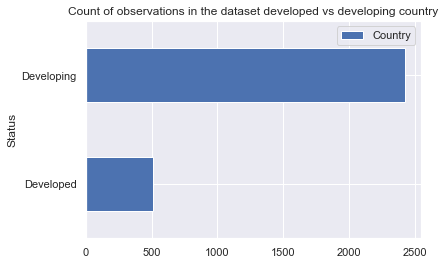

In [13]:
plt.figure(figsize=(8,5))
cat_features.groupby('Status').count().plot(kind = 'barh')
plt.title('Count of observations in the dataset developed vs developing country')

note: in the dataset developing country account for 2426 and developed country for 512 Observations

#### What is the status of target variable in the dataset? 

In [14]:
# the Top 20 developing Country with low life_expectancy
B = df1.groupby(['Country'])['Life_expectancy'].agg([np.mean, np.std]).sort_values(by = 'mean', ascending = False).tail(20)
B.reset_index()

,Country,mean,std
0,Nigeria,51.35625,3.328257
1,Swaziland,51.32500,4.825695
2,Zimbabwe,50.48750,6.832069
3,Côte d'Ivoire,50.38750,2.184758
4,Chad,50.38750,2.555484
5,Malawi,49.89375,5.370347
6,Angola,49.01875,2.838830
7,Lesotho,48.78125,3.137349
8,Central African Republic,48.51250,3.509012
9,Sierra Leone,46.11250,4.029702


#####  Note: Check the status of all countries, there are some coutntries with no information in life_expentancy (I drop 10 rows of these countries)

In [15]:
df1[df1['Country']=='Saint Kitts and Nevis']

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,NaN,8.54,NaN,97.0,NaN,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4


In [16]:
# liste of countries to filter by
liste = ['Cook Islands', 'Dominica', 'Marshall Islands', 'Monaco', 'Nauru', 'Niue', 'Palau', 'Saint Kitts and Nevis','San Marino', 'Tuvalu']

In [17]:
filter = df1[df1['Country'].isin(liste)]
filter

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,NaN,0.01,NaN,98.0,NaN,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,NaN,0.01,11.419555,96.0,NaN,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,NaN,0.01,871.878317,8.0,NaN,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,NaN
1715,Monaco,2013,Developing,NaN,NaN,NaN,0.01,NaN,99.0,NaN,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,NaN,0.01,15.606596,87.0,NaN,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,NaN,0.01,NaN,99.0,NaN,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,NaN,NaN,344.690631,99.0,NaN,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,NaN,8.54,NaN,97.0,NaN,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,NaN,0.01,NaN,69.0,NaN,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,NaN,0.01,78.281203,9.0,NaN,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,NaN


#### Note:
these countries have missing data with 5 features and others 10 features We can confidently drop these 10 rows, it would not impact the len the dataset. 

In [18]:
### Drop all these countries (10 rows)
df1 = df1.drop(df1[df1['Country'].isin(liste)].index)

##### 2 Life_expectancy versus Countries, years and status

##### Summary statistics

In [19]:
# overview of the mean, std, min, max of live expectancy in developing and developed Country
df1.groupby(by=['Status', 'Year'])['Life_expectancy'].describe()

count       mean        std   min     25%    50%     75%  \
Status     Year                                                             
Developed  2000   32.0  76.803125   2.744200  71.0  75.675  77.70  78.525   
           2001   32.0  77.128125   2.948399  69.9  75.925  78.00  78.725   
           2002   32.0  77.546875   3.049377  71.4  76.275  78.20  78.925   
           2003   32.0  77.940625   3.614028  71.1  76.175  78.40  79.325   
           2004   32.0  78.384375   4.330694  71.0  75.700  78.70  79.725   
           2005   32.0  78.590625   3.448830  71.9  77.125  78.85  81.000   
           2006   32.0  79.131250   3.959019  72.2  76.375  79.30  81.125   
           2007   32.0  79.300000   4.028127  72.0  77.700  79.50  81.300   
           2008   32.0  78.931250   3.621837  71.1  76.750  79.70  81.325   
           2009   32.0  79.584375   4.005489  72.2  76.900  79.90  81.775   
           2010   32.0  80.146875   4.276793  72.4  77.275  81.00  82.075   
           2011   32.0  80.706250   4.269316  72.8  77.600  81.85  82.700   
           2012   32.0  80.443750   3.821074  73.0  77.775  81.20  82.550   
           2013   32.0  80.681250   3.810126  73.0  78.075  81.35  82.550   
           2014   32.0  81.137500   4.161866  73.4  78.400  81.65  82.925   
           2015   32.0  80.709375   3.460501  73.6  78.600  81.55  82.725   
Developing 2000  151.0  64.619868  10.046200  39.0  57.400  67.40  72.600   
           2001  151.0  65.009934   9.916254  41.0  57.550  67.60  73.000   
           2002  151.0  65.190728   9.698305  44.0  57.950  67.60  73.000   
           2003  151.0  65.206623   9.654441  41.5  58.000  67.60  73.000   
           2004  151.0  65.370861   9.525409  42.3  58.200  68.00  73.000   
           2005  151.0  66.009272   9.284132  43.3  58.750  68.10  73.450   
           2006  151.0  66.450331   9.238174  44.3  59.250  68.50  73.600   
           2007  151.0  66.860927   9.036799  45.3  59.950  68.50  73.750   
           2008  151.0  67.413907   8.757496  46.2  61.400  68.90  73.950   
           2009  151.0  67.894040   8.406547  47.1  61.700  69.20  74.350   
           2010  151.0  67.908609   8.652344  36.3  62.000  69.50  74.300   
           2011  151.0  68.523841   8.170563  48.9  62.250  71.10  74.850   
           2012  151.0  68.898013   7.903615  49.7  63.100  69.90  74.950   
           2013  151.0  69.234437   7.734891  49.9  63.950  71.00  74.900   
           2014  151.0  69.501987   7.842903  48.1  64.200  71.40  75.350   
           2015  151.0  69.690066   7.498282  51.0  64.600  71.60  75.500   

                  max  
Status     Year        
Developed  2000  81.1  
           2001  82.0  
           2002  84.0  
           2003  87.0  
           2004  89.0  
           2005  88.0  
           2006  88.0  
           2007  89.0  
           2008  86.0  
           2009  89.0  
           2010  89.0  
           2011  88.0  
           2012  88.0  
           2013  87.0  
           2014  89.0  
           2015  88.0  
Developing 2000  79.1  
           2001  79.4  
           2002  79.5  
           2003  79.7  
           2004  82.0  
           2005  81.0  
           2006  86.0  
           2007  89.0  
           2008  89.0  
           2009  86.0  
           2010  87.0  
           2011  85.0  
           2012  84.0  
           2013  87.0  
           2014  89.0  
           2015  85.0

In [20]:
df_developing = df1[df1['Status']=='Developing']

In [21]:
df_developed= df1[df1['Status']=='Developed']

In [22]:
# the Top 10 developing Countries with low life_expectancy
B = df_developing.groupby(['Country'])['Life_expectancy'].agg([np.mean, np.std]).sort_values(by = 'mean').head(10)
B.reset_index()

,Country,mean,std
0,Sierra Leone,46.11250,4.029702
1,Central African Republic,48.51250,3.509012
2,Lesotho,48.78125,3.137349
3,Angola,49.01875,2.838830
4,Malawi,49.89375,5.370347
5,Chad,50.38750,2.555484
6,Côte d'Ivoire,50.38750,2.184758
7,Zimbabwe,50.48750,6.832069
8,Swaziland,51.32500,4.825695
9,Nigeria,51.35625,3.328257


In [23]:
# the Top 10 developing Countries with high life_expectancy
B = df_developing.groupby(['Country'])['Life_expectancy'].agg([np.mean, np.std]).sort_values(by = 'mean', ascending = False).head(10)
B.reset_index()

,Country,mean,std
0,France,82.21875,3.166958
1,Canada,81.68750,2.240201
2,Israel,81.30000,1.556920
3,Greece,81.21875,3.006264
4,Finland,80.71250,3.354574
5,Republic of Korea,80.48750,3.177184
6,Chile,79.45000,2.073323
7,Costa Rica,78.59375,0.711307
8,Cuba,77.97500,0.745207
9,Qatar,77.03125,0.672031


In [24]:
# the Top 10 developed Countries with high life_expectancy
B = df_developed.groupby(['Country'])['Life_expectancy'].agg([np.mean, np.std]).sort_values(by = 'mean').head(10)
B.reset_index()

,Country,mean,std
0,Lithuania,72.80625,1.848411
1,Bulgaria,72.85000,1.050714
2,Latvia,73.73125,2.312205
3,Hungary,73.82500,1.296405
4,Romania,74.05000,1.995996
5,Slovakia,74.75000,1.120714
6,Poland,75.65000,1.170755
7,Croatia,76.11875,1.144388
8,Czechia,76.76875,1.322986
9,United States of America,78.06250,0.832566


In [25]:
# the Top 10 developed Countries with high life_expectancy
B = df_developed.groupby(['Country'])['Life_expectancy'].agg([np.mean, np.std]).sort_values(by = 'mean', ascending = False).head(10)
B.reset_index()

,Country,mean,std
0,Japan,82.53750,0.767572
1,Sweden,82.51875,2.677865
2,Iceland,82.44375,2.238443
3,Switzerland,82.33125,1.265817
4,Italy,82.18750,2.669051
5,Spain,82.06875,2.792065
6,Australia,81.81250,1.542671
7,Norway,81.79375,2.884087
8,Austria,81.48125,3.108101
9,Singapore,81.47500,2.172710


#### Note:  the results above stated that:
we have 32 developed countries (DDC) and 151 developing countries (DPC) in the dataset
the minimum life expectancy (LE) in DDC is 69 whereas in DPC is 39
the maximum LE in DDC is 89 and it is 89 in DPC
the range is huge in DPC as compared to DDC.
It would be good to explore the 95% Confidence interval of LE of both DDC and DGC
and maybe explore to which extend (level of significance) LE of DDC is as compared to LE in DPC

#####  Visualize the dependent variable - life expectancy  versus years, status, countries

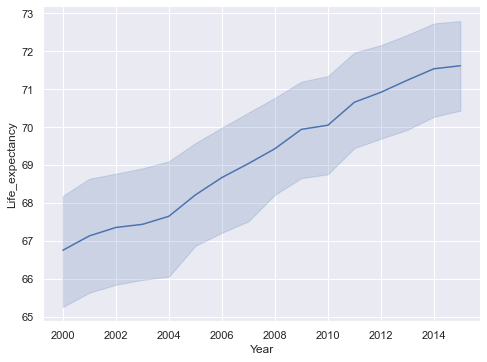

In [26]:
g = sns.relplot(x=df1['Year'], y=df1['Life_expectancy'], data=df1, kind="line")
g.fig.set_size_inches(7,5)
plt.show()

NOte: life_expectancy increase overs years 

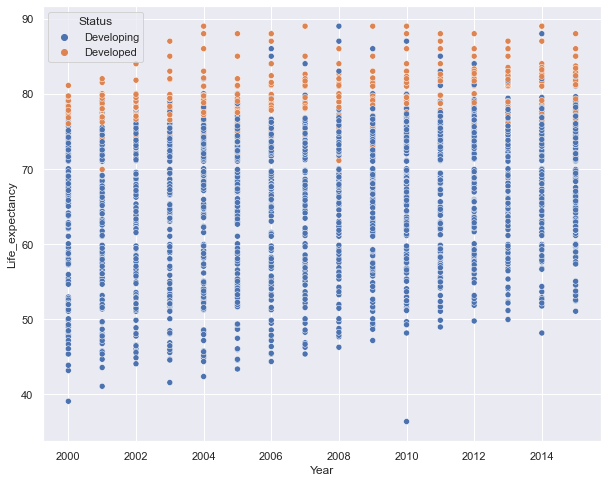

In [27]:
plt.subplots(figsize=(10,8))
sns.scatterplot(data = df1, y='Life_expectancy', x='Year', hue='Status')
plt.show()

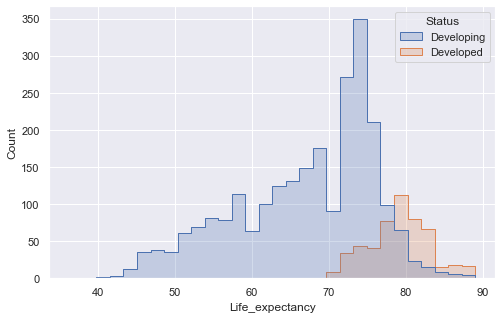

In [28]:
plt.subplots(figsize=(8,5))
sns.histplot(df1, x="Life_expectancy", hue="Status", element="step")

Note: the range of life expectancy is wide in developing country as compared to developed country.

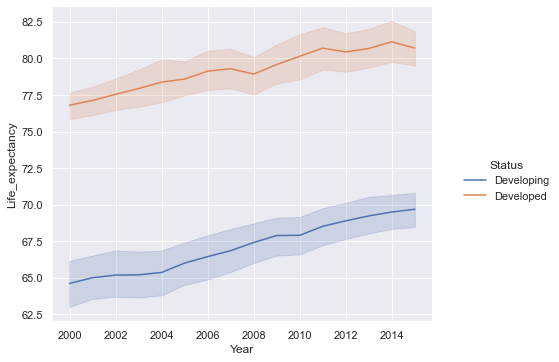

In [29]:
g = sns.relplot(x=df1['Year'], y=df1['Life_expectancy'], data=df1, kind='line', hue=df1['Status'])
g.fig.set_size_inches(8,5)
plt.show()

life expectancy in developed country is greater than the one in developing country.
the standard deviation of life_expectancy in developing country is large as compare to developed country. 
This highlight the fact that we will could found very high difference of life expectancy among countries of developing country. 

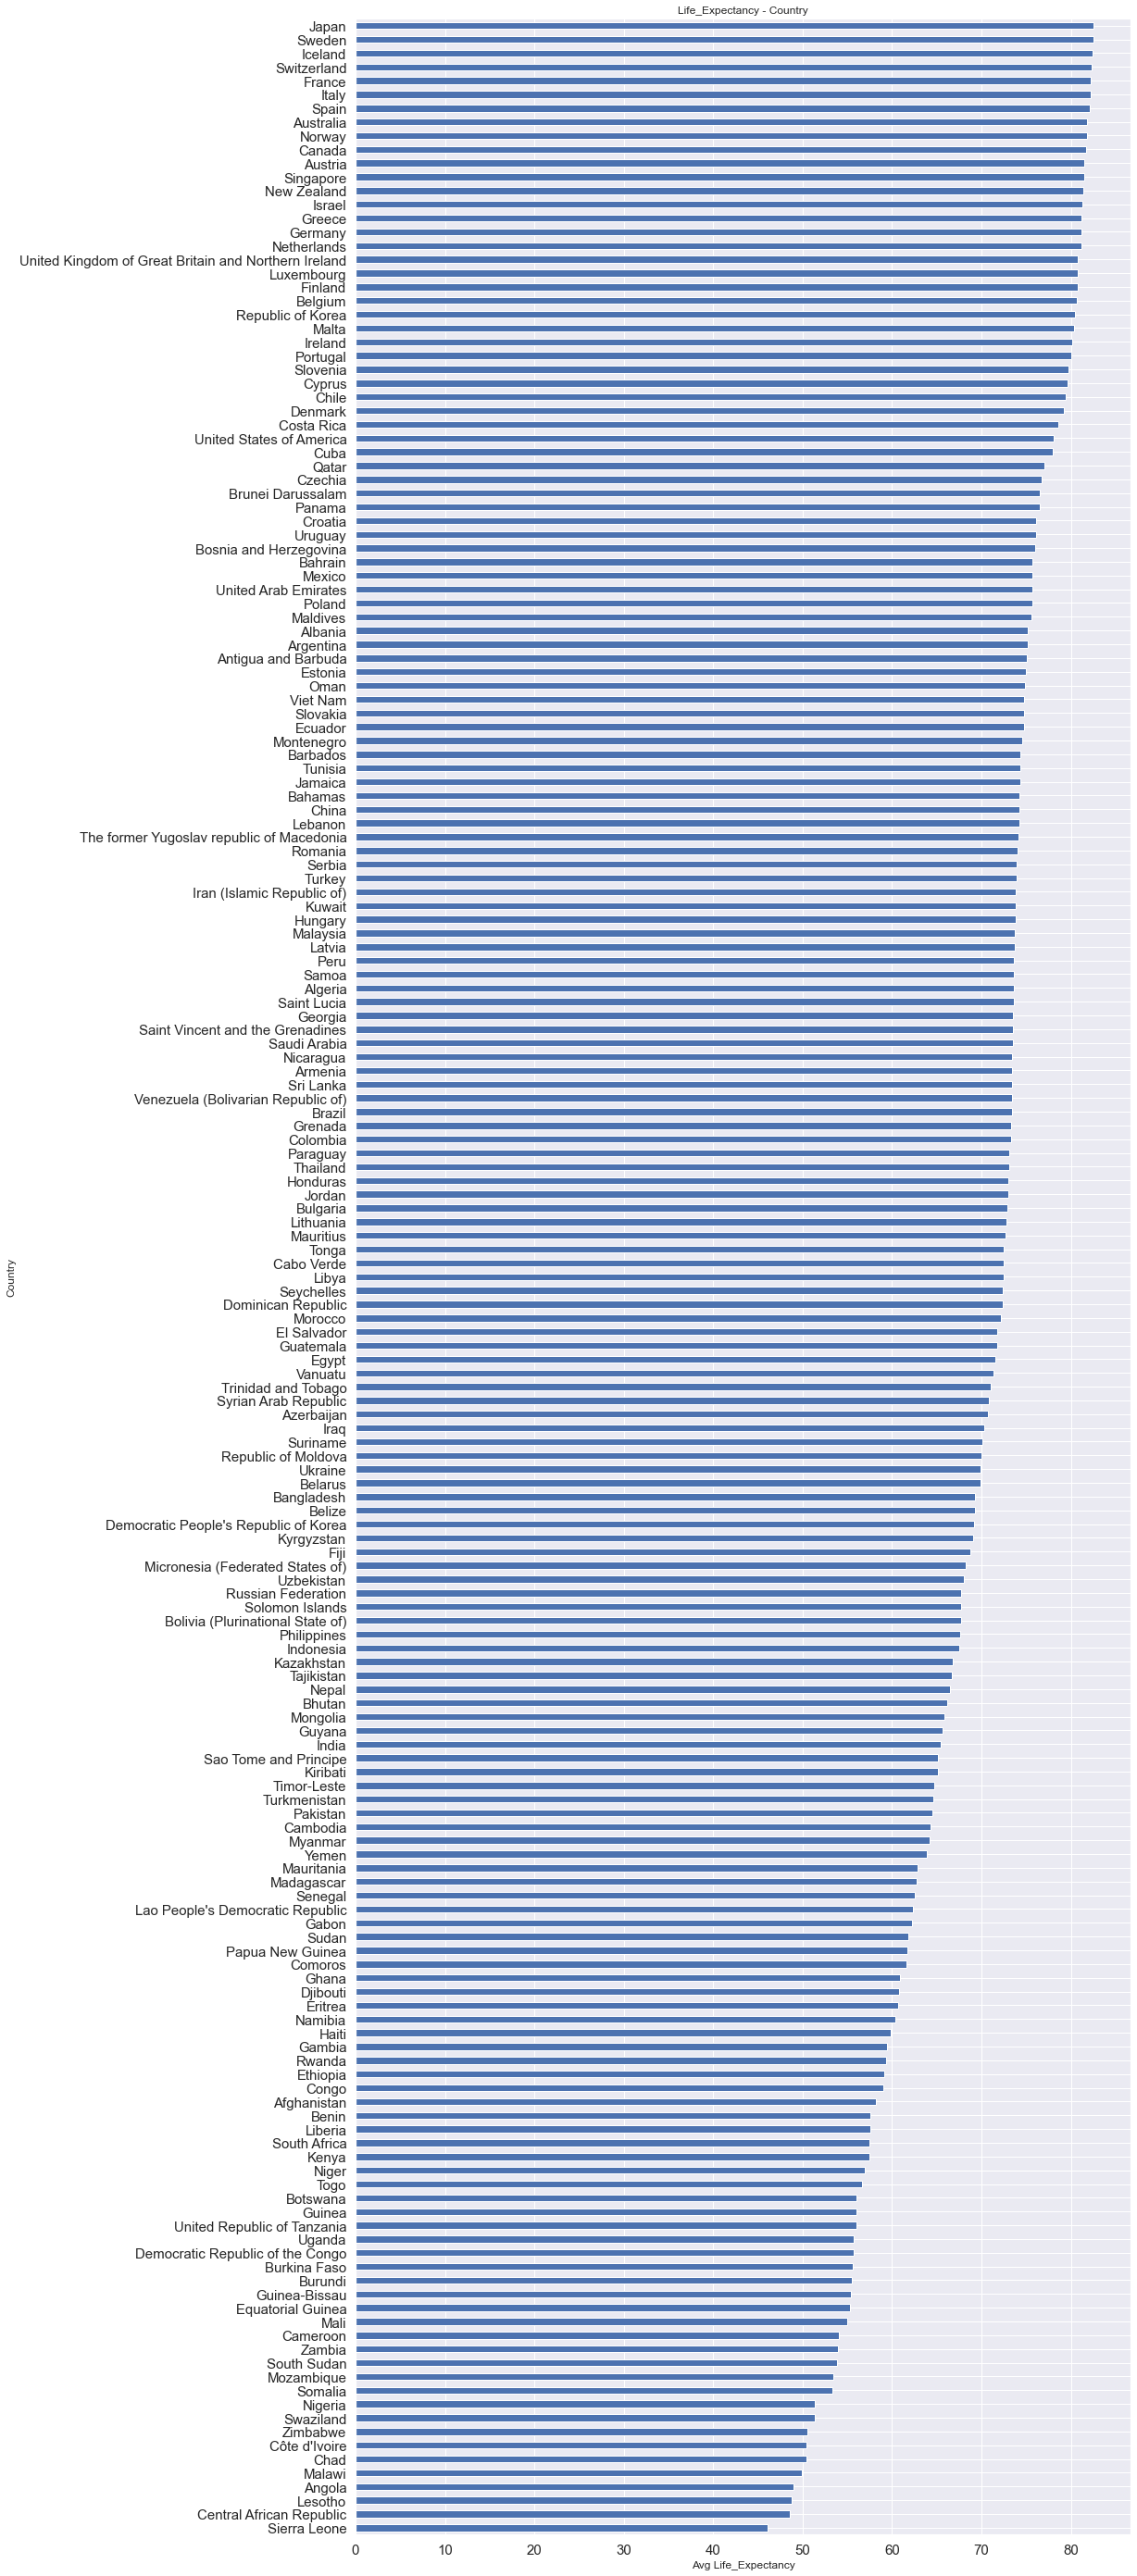

In [30]:
Ctry_life_exp = df1.groupby('Country')['Life_expectancy'].mean().sort_values(ascending=True)
Ctry_life_exp.plot(kind='barh', figsize=(15,50), fontsize=15)
plt.title("Life_Expectancy - Country")
plt.ylabel("Country")
plt.xlabel("Avg Life_Expectancy")
plt.show()

### 2.summary statistics for numeric features 

In [31]:
num_df= df1.select_dtypes(exclude= "O")

In [32]:
round(num_df.describe(),3)

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
count,2928.000,2928.000,2928.000,2090.000,2735.000,2322.000,2375.000,1955.000,2896.000,2153.000,2909.000,2702.000,2909.000,2928.000,2485.000,2.284000e+03,2896.000,2896.000,2638.000,2742.000
mean,2007.500,69.225,164.796,42.600,4.615,933.532,80.961,3636.195,38.235,57.362,82.548,5.930,82.321,1.748,7494.211,1.276454e+07,4.851,4.881,0.658,12.113
std,4.611,9.524,124.292,137.941,4.051,2195.059,25.018,13900.547,19.960,185.077,23.417,2.483,23.707,5.086,14282.251,6.103765e+07,4.421,4.510,0.162,3.151
min,2000.000,36.300,1.000,1.000,0.010,0.100,1.000,1.000,1.000,1.000,3.000,0.370,2.000,0.100,1.681,3.400000e+01,0.100,0.100,0.253,2.800
25%,2003.750,63.100,74.000,2.000,0.905,36.294,77.000,17.000,19.300,3.000,78.000,4.260,78.000,0.100,463.853,1.966738e+05,1.600,1.575,0.523,10.200
50%,2007.500,72.100,144.000,9.000,3.770,155.201,92.000,128.000,43.350,11.000,93.000,5.750,93.000,0.100,1764.974,1.391756e+06,3.300,3.400,0.687,12.400
75%,2011.250,75.700,228.000,33.000,7.715,630.305,97.000,1210.000,56.100,46.000,97.000,7.490,97.000,0.800,5932.900,7.426746e+06,7.200,7.200,0.784,14.300
max,2015.000,89.000,723.000,1800.000,17.870,19479.912,99.000,212183.000,77.600,2500.000,99.000,17.600,99.000,50.600,119172.742,1.293859e+09,27.700,28.600,0.948,20.700


Note: 

In [33]:
print("Top 10 Countries with high Adult_mortality")
print(df1.groupby("Country").Adult_Mortality.mean().sort_values(ascending =False).head(10))

Top 10 Countries with high Adult_mortality
Country
Lesotho          550.0625
Zimbabwe         462.3750
Botswana         448.1250
Malawi           424.4375
Côte d'Ivoire    417.3125
South Africa     412.7500
Sierra Leone     357.8125
Zambia           354.3125
Kenya            348.5625
South Sudan      346.3125
Name: Adult_Mortality, dtype: float64


In [34]:
print("Top 10 Countries with high Income_composition_of_resources")
df1.groupby("Country").Income_composition_of_resources.mean().sort_values(ascending =False).head(10)

Top 10 Countries with high Income_composition_of_resources


Country
Norway         0.931438
Australia      0.918125
Switzerland    0.911062
Denmark        0.899875
Netherlands    0.899750
Germany        0.894500
Sweden         0.893125
Canada         0.892188
Ireland        0.891500
New Zealand    0.891188
Name: Income_composition_of_resources, dtype: float64

In [35]:
print("Top 10 Countries with high GDP")
df1.groupby("Country").GDP.mean().sort_values(ascending =False).head(10)

Top 10 Countries with high GDP


Country
Switzerland    57362.874601
Luxembourg     53257.012741
Qatar          40748.444104
Netherlands    34964.719797
Australia      34637.565047
Ireland        33835.272005
Austria        33827.476309
Denmark        33067.407916
Singapore      32790.105907
Kuwait         31914.378339
Name: GDP, dtype: float64

In [36]:
print("Top 10 Countries with high Population")
df1.groupby("Country").Population.mean().sort_values(ascending =False).head(10)

Top 10 Countries with high Population


Country
India                 4.214677e+08
Indonesia             1.165553e+08
Brazil                8.812807e+07
Nigeria               7.087700e+07
Pakistan              6.902796e+07
Russian Federation    5.976209e+07
Ethiopia              4.395076e+07
Bangladesh            4.298516e+07
Germany               3.875735e+07
Philippines           3.726540e+07
Name: Population, dtype: float64

In [37]:
print("Top 10 Countries with high Alcohol")
df1.groupby("Country").Alcohol.mean().sort_values(ascending =False).head(10)

Top 10 Countries with high Alcohol


Country
Belarus       13.497333
Czechia       13.026000
Ireland       12.654000
Lithuania     12.632667
Croatia       12.448000
France        12.404667
Austria       12.236000
Portugal      12.211333
Luxembourg    11.922000
Germany       11.628667
Name: Alcohol, dtype: float64

##### Review the Distribution of all features

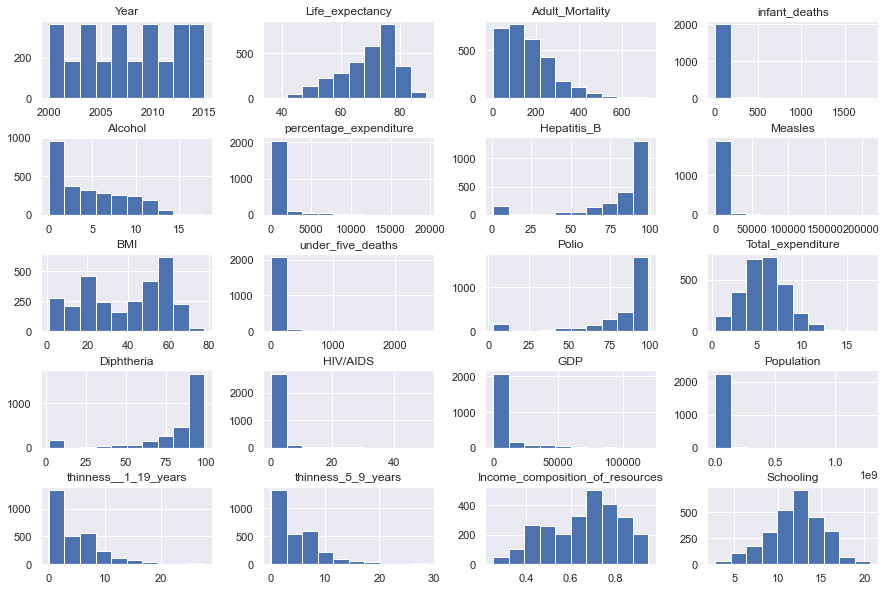

In [38]:
#view the distribution of data 
df1.hist(figsize=(15, 10) )
plt.subplots_adjust(hspace=0.5);

### 3.Correlations among all features 

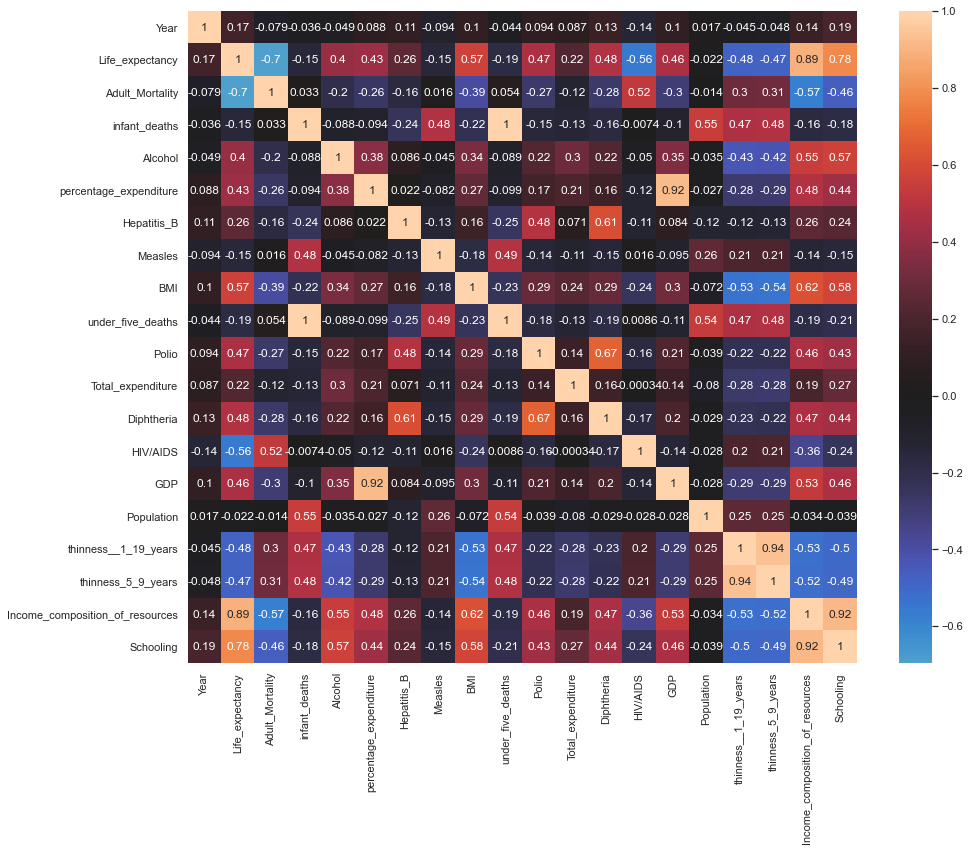

In [39]:
plt.figure(figsize=(15, 12))
sns.heatmap(df1.corr(), center=0, annot=True)

life_expectancy have :
strong correlation with (Schooling, Income_composition_of_resources, Adult_Mortality ), 
weak correlation with(HIV/AIDS, percentage_expenditure, BMI, Diphtheria, GDP, thinness__1_19_years, and thinness_5_9_years)

### 3. Analyse correlation of life expectancy versus group of factors
#### 3.1 Immunization_factors and life_expectancy

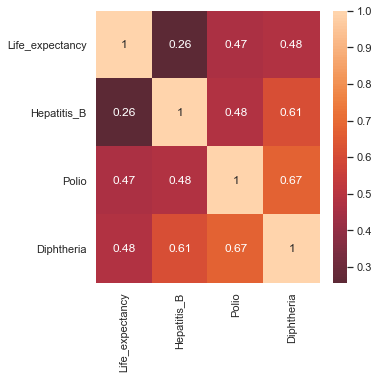

In [40]:
Immunization_factors =['Life_expectancy','Hepatitis_B','Polio','Diphtheria']
plt.figure(figsize=(5,5))
sns.heatmap(df1[Immunization_factors].corr(), center=0, annot=True)

The correlation are very weak with immunization factors as Polio and Diphtheria

<Figure size 864x864 with 0 Axes>

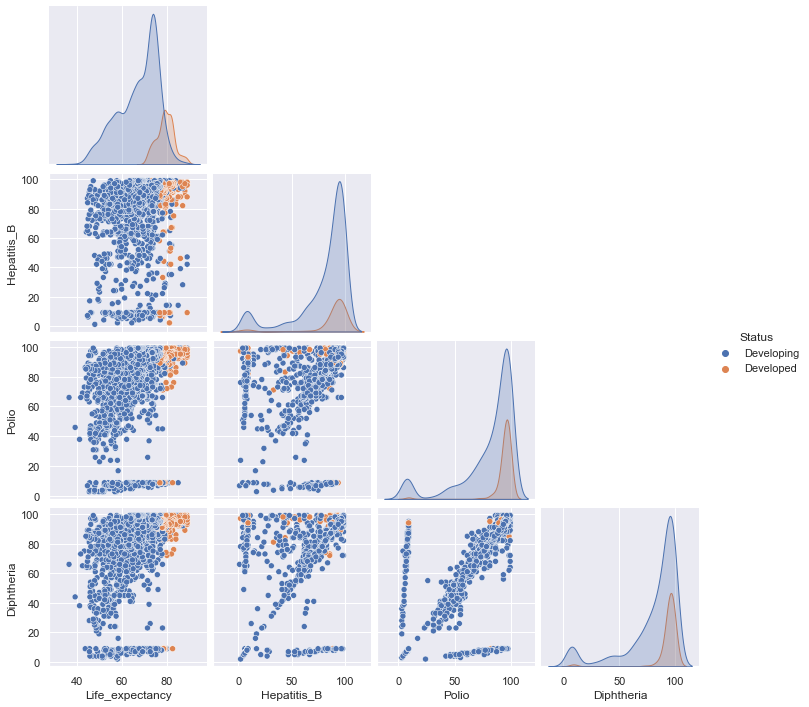

In [41]:
Immunization_factors =['Status','Life_expectancy','Hepatitis_B','Polio','Diphtheria']
plt.figure(figsize=(12,12))
sns.pairplot(df1[Immunization_factors], hue='Status', corner=True)

####  3.2 Social Factors with life_expectancy 

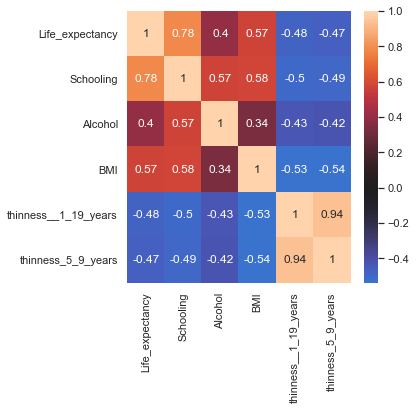

In [42]:
Social_factors=['Status','Life_expectancy','Schooling','Alcohol','BMI','thinness__1_19_years','thinness_5_9_years']
plt.figure(figsize=(5,5))
sns.heatmap(df1[Social_factors].corr(), center=0, annot=True)

<Figure size 504x504 with 0 Axes>

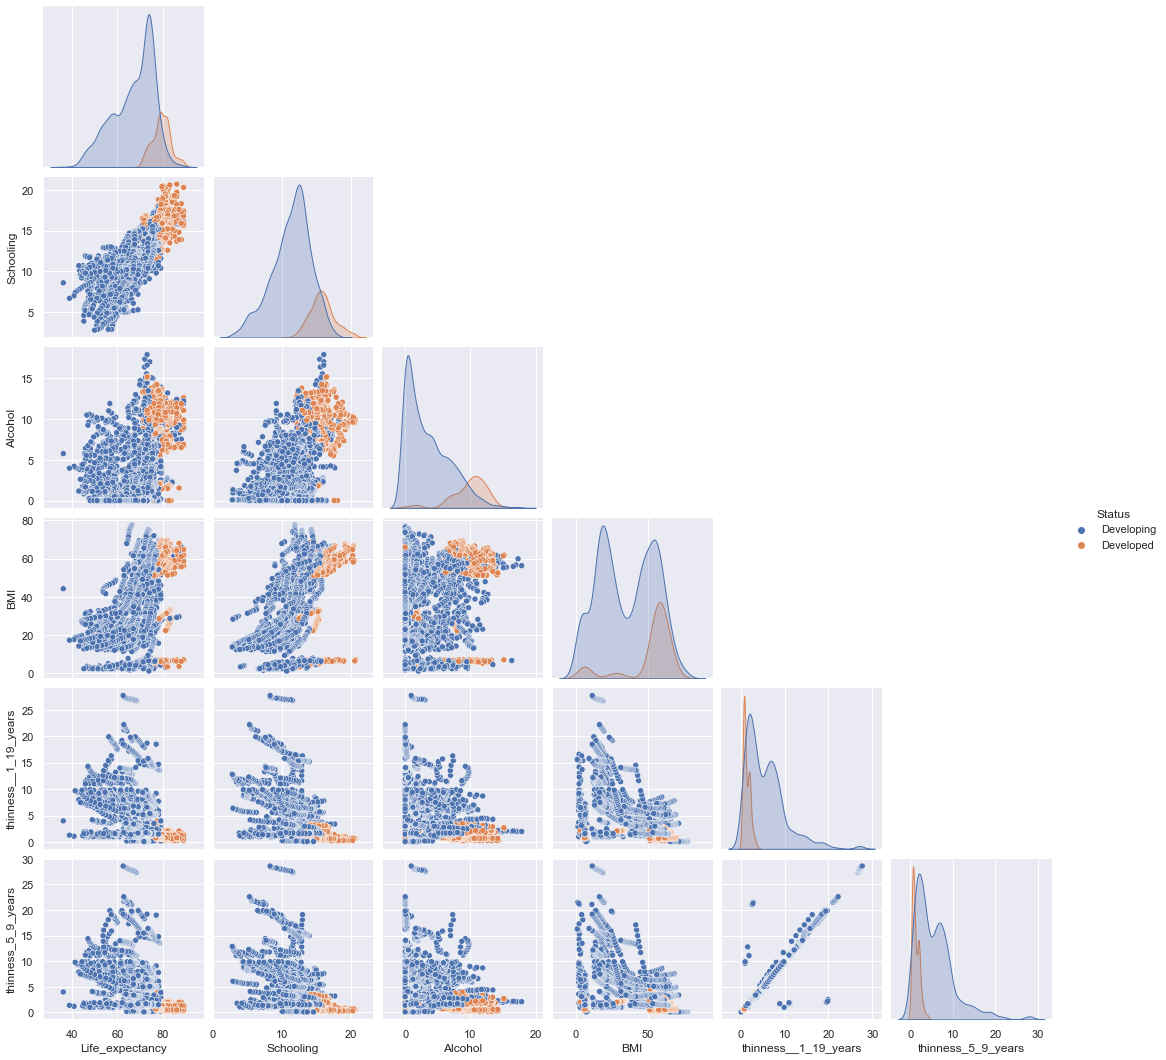

In [43]:
Social_factors=['Status','Life_expectancy','Schooling','Alcohol','BMI','thinness__1_19_years','thinness_5_9_years']
plt.figure(figsize=(7,7))
sns.pairplot(df1[Social_factors], hue='Status', corner=True)

Note: In general, all the social factors are correlated to life_expectancy, but Schooling have high correlation

#### 3.3 Mortality_factors and Life_expectancy

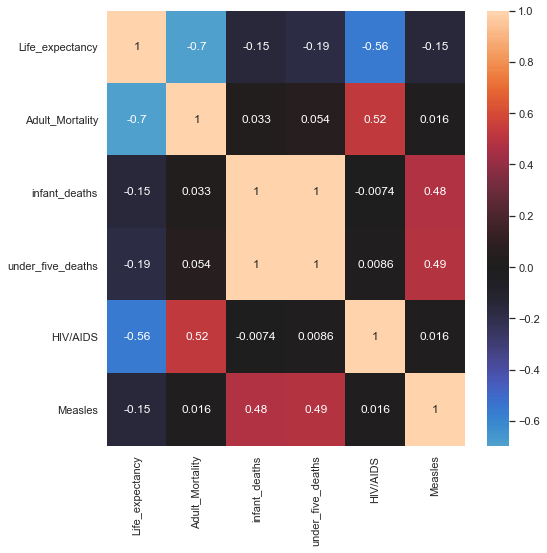

In [44]:
Mortality_factors =["Life_expectancy","Adult_Mortality","infant_deaths","under_five_deaths","HIV/AIDS","Measles"]
plt.figure(figsize=(8, 8))
sns.heatmap(df1[Mortality_factors].corr(), center=0, annot=True)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

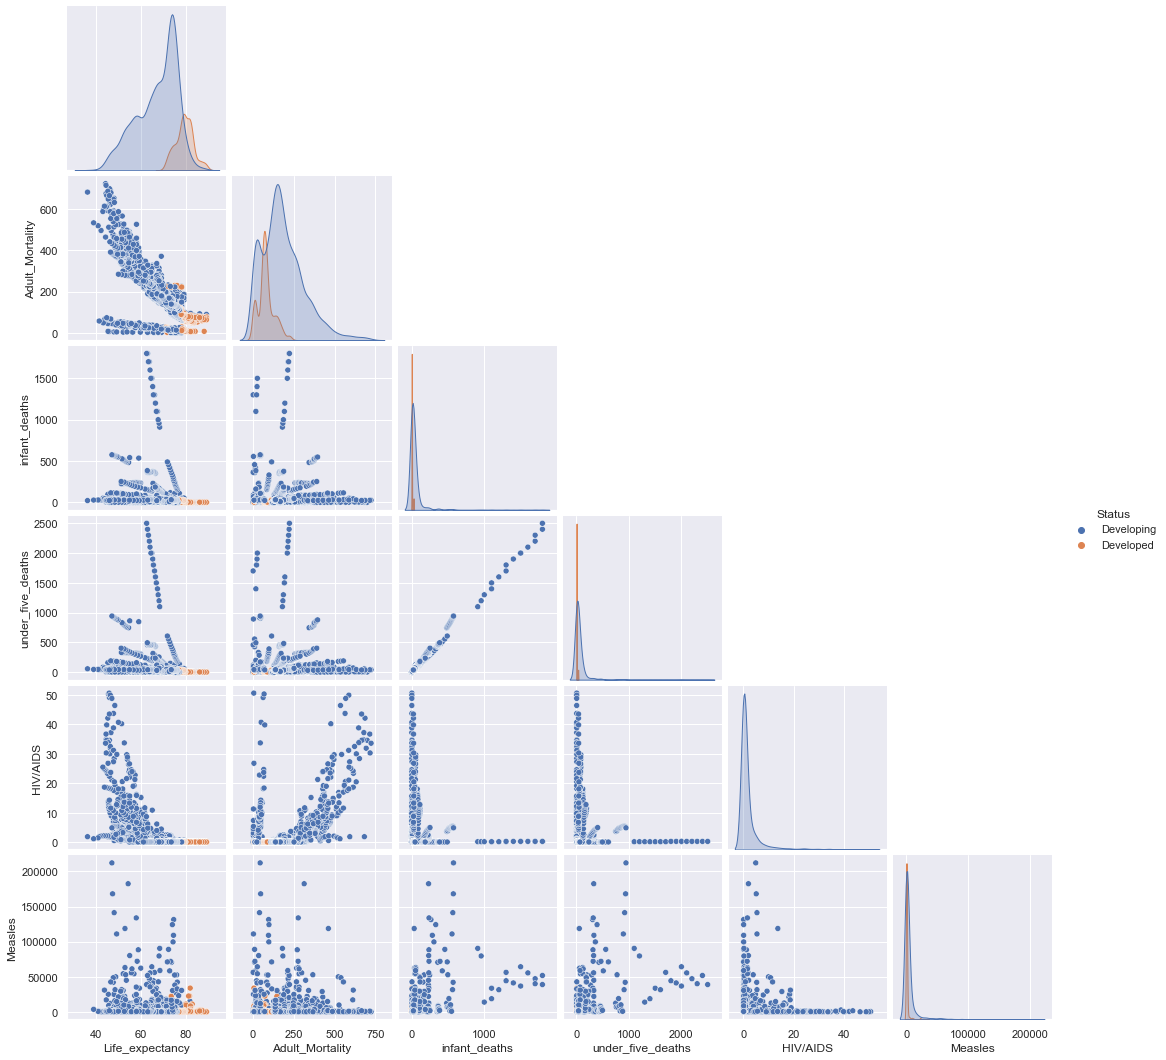

In [45]:
Mortality_factors =["Status","Life_expectancy","Adult_Mortality","infant_deaths","under_five_deaths","HIV/AIDS","Measles"]
plt.figure(figsize=(8,8))
sns.pairplot(df1[Mortality_factors], hue='Status', corner=True)

Note: there is weak correlation between HIV and life_expectancy. 
under_five_deaths is correlated with infant deaths

####  3.4 Economical_factors and Life_expectancy

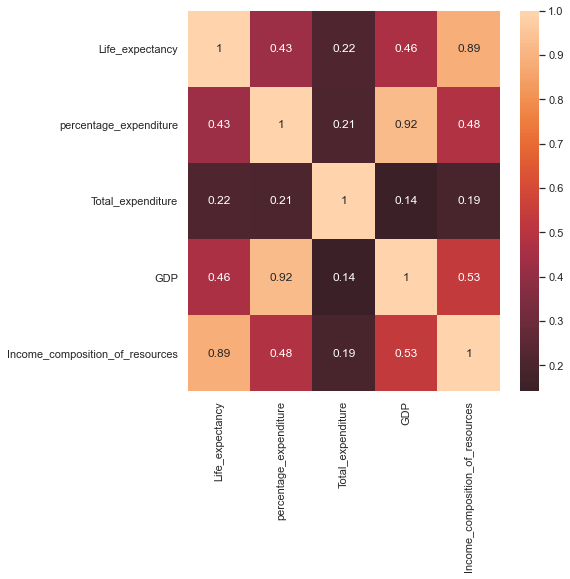

In [46]:
Economical_factors=['Life_expectancy','percentage_expenditure','Total_expenditure','GDP','Income_composition_of_resources']
plt.figure(figsize=(7, 7))
sns.heatmap(df1[Economical_factors].corr(), center=0, annot=True)

<Figure size 576x576 with 0 Axes>

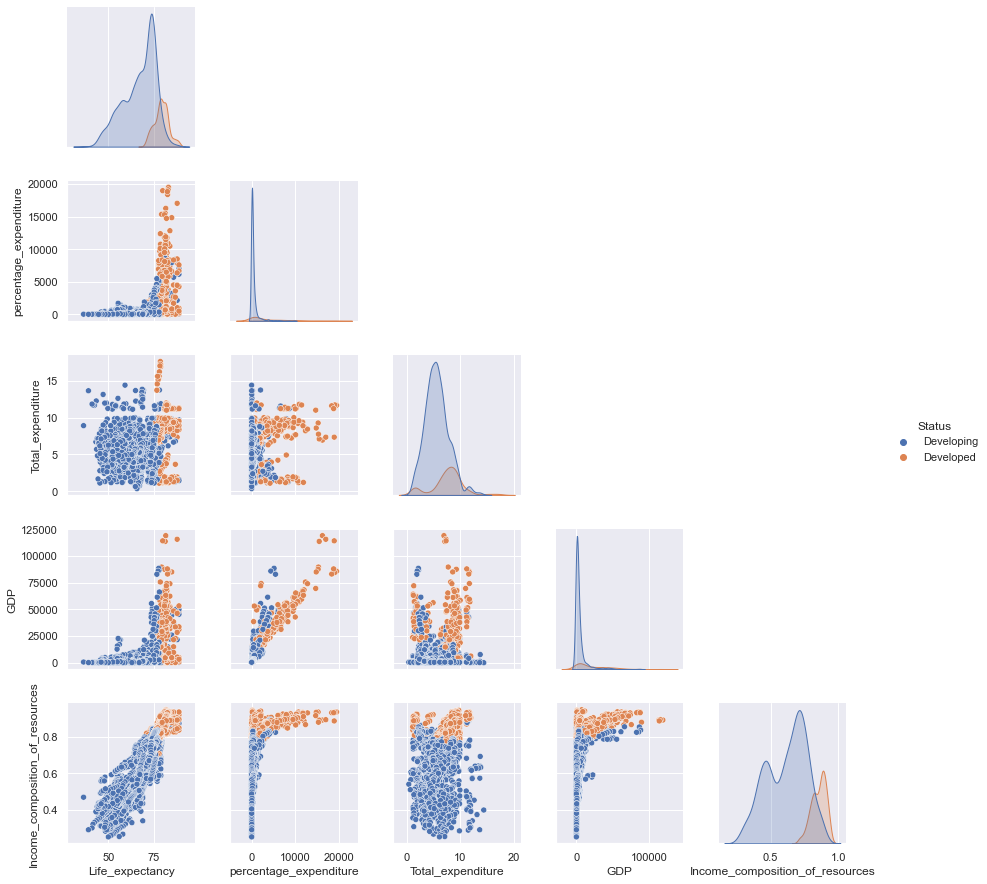

In [47]:
Economical_factors=['Status','Life_expectancy','percentage_expenditure','Total_expenditure','GDP','Income_composition_of_resources']
plt.figure(figsize=(8,8))
sns.pairplot(df1[Economical_factors], hue='Status', corner=True)

Note:  there is 

### 4.Exploration of each features versus  life_expectancy

Note: tres bonne reference
https://www.kaggle.com/rishavchowdhury0123/life-expectancy-eda-and-prediction

In [48]:
#Immunization factors
#Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
#Polio (Pol3) immunization coverage among 1-year-olds (%)
#Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

In [49]:
Immunization_df =['Life_expectancy','Country','Status', 'Year','Hepatitis_B','Polio','Diphtheria']

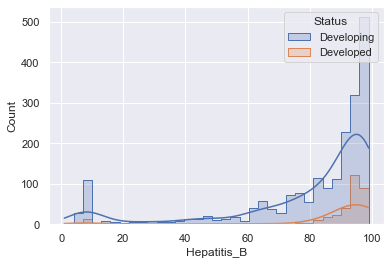

In [50]:
sns.histplot(data=df1, x='Hepatitis_B', hue ='Status', kde=True, element='step')

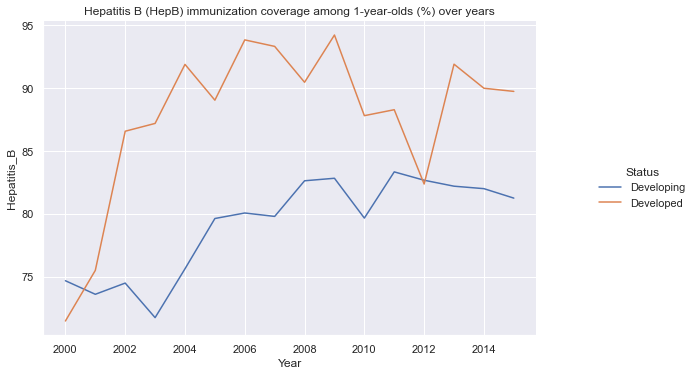

In [51]:
g = sns.relplot(x='Year', y='Hepatitis_B', data=df1, kind='line', hue='Status')
g.fig.set_size_inches(10,5)
plt.title('Hepatitis B (HepB) immunization coverage among 1-year-olds (%) over years')
plt.show()

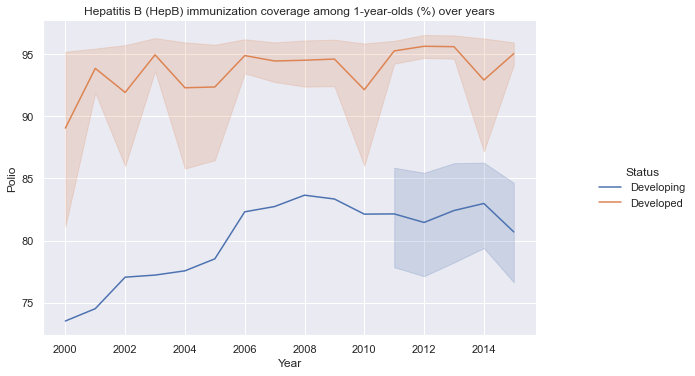

In [52]:
g = sns.relplot(x='Year', y='Polio', data=df1, kind='line', hue='Status')
g.fig.set_size_inches(10,5)
plt.title('Hepatitis B (HepB) immunization coverage among 1-year-olds (%) over years')
plt.show()

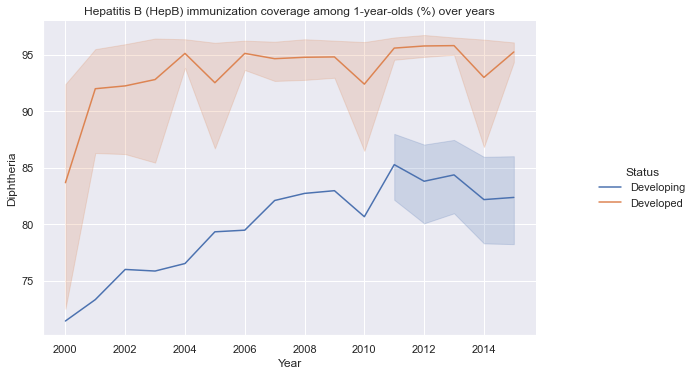

In [53]:
g = sns.relplot(x='Year', y='Diphtheria', data=df1, kind='line', hue='Status')
g.fig.set_size_inches(10,5)
plt.title('Hepatitis B (HepB) immunization coverage among 1-year-olds (%) over years')
plt.show()

### How immunisation affect life expectancy in developed and developing countries

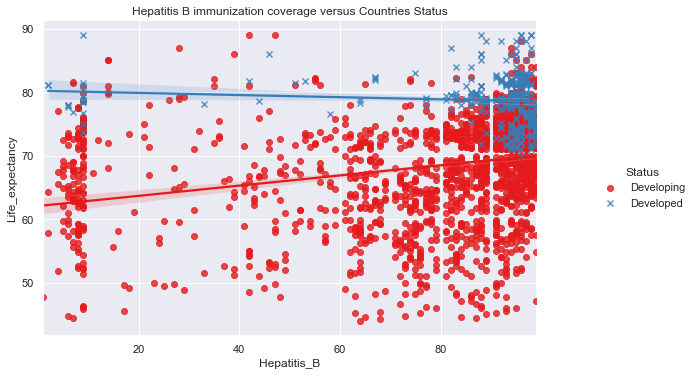

In [54]:
g= sns.lmplot(x="Hepatitis_B", y="Life_expectancy", 
           data=df1, hue="Status", markers=["o", "x"],palette="Set1")
g.fig.set_size_inches(10,5)
plt.title('Hepatitis B immunization coverage versus Countries Status')
plt.show()

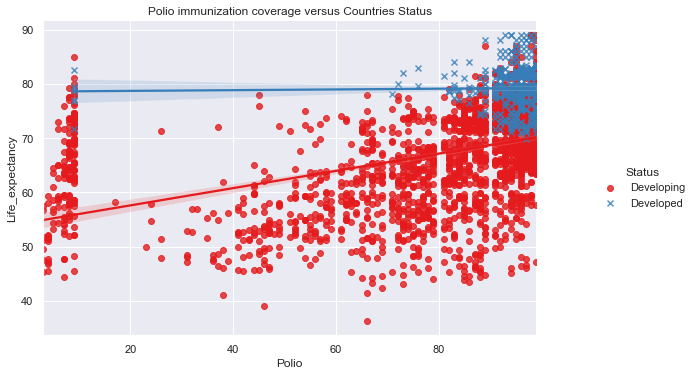

In [55]:
g= sns.lmplot(x="Polio", y="Life_expectancy", 
           data=df1, hue="Status", markers=["o", "x"],palette="Set1")
g.fig.set_size_inches(10,5)
plt.title('Polio immunization coverage versus Countries Status')
plt.show()

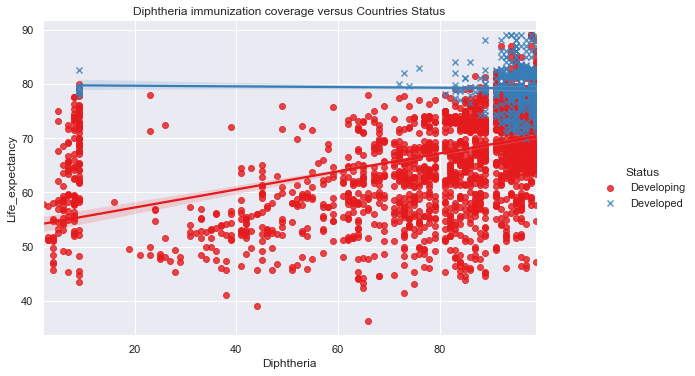

In [56]:
g= sns.lmplot(x="Diphtheria", y="Life_expectancy", 
           data=df1, hue="Status", markers=["o", "x"],palette="Set1")
g.fig.set_size_inches(10,5)
plt.title('Diphtheria immunization coverage versus Countries Status')
plt.show()

NOTE: In general, from the figures above, Immunization has a positive impact in increasing life expectancy in developing countries as compared to developed countries. 

####  Immunization versus Infants deaths
note immunisation and impact in the reduction of infants deaths developing countries

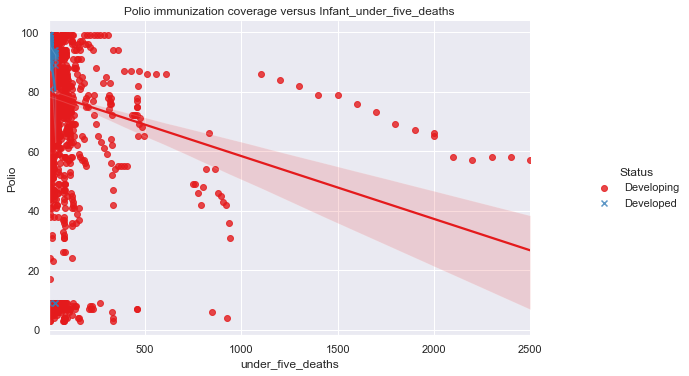

In [57]:
g= sns.lmplot(y="Polio", x="under_five_deaths", 
           data=df1, hue="Status", markers=["o", "x"],palette="Set1")
g.fig.set_size_inches(10,5)
plt.title('Polio immunization coverage versus Infant_under_five_deaths')
plt.show()

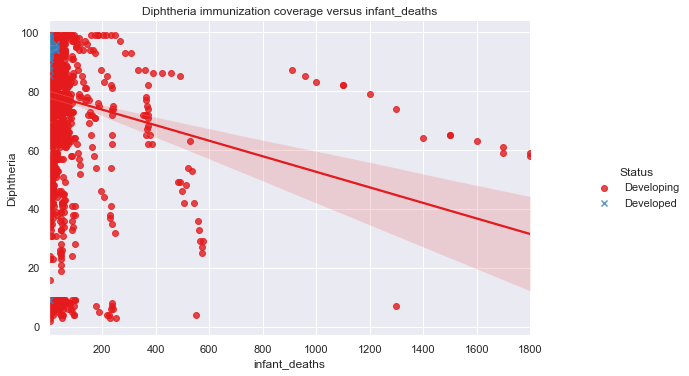

In [58]:
g= sns.lmplot(y="Diphtheria", x="infant_deaths", 
           data=df1, hue="Status", markers=["o", "x"],palette="Set1")
g.fig.set_size_inches(10,5)
plt.title('Diphtheria immunization coverage versus infant_deaths')
plt.show()

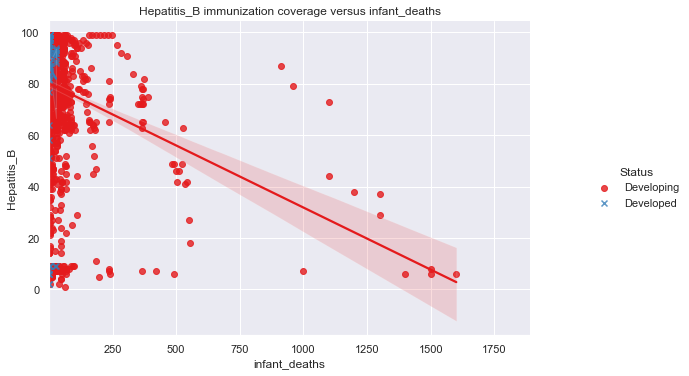

In [59]:
g= sns.lmplot(y="Hepatitis_B", x="infant_deaths", 
           data=df1, hue="Status", markers=["o", "x"],palette="Set1")
g.fig.set_size_inches(10,5)
plt.title('Hepatitis_B immunization coverage versus infant_deaths')
plt.show()

Note: In developing countries, we can realize that immunization has an positive impact on infant deaths (reduce deaths among children) and therefore life expectancy. 

### Mortality factors and life expectancy

In [60]:
#Mortality factors
#Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
#Number of Infant Deaths per 1000 population #add(5 to 15)
#Number of under-five deaths per 1000 population
#Deaths per 1 000 live births HIV/AIDS (0-4 years)
#Measles - number of reported cases per 1000 population

In [61]:
Mortality_factors =["Adult_Mortality","infant_deaths","under_five_deaths","HIV/AIDS","Measles"]

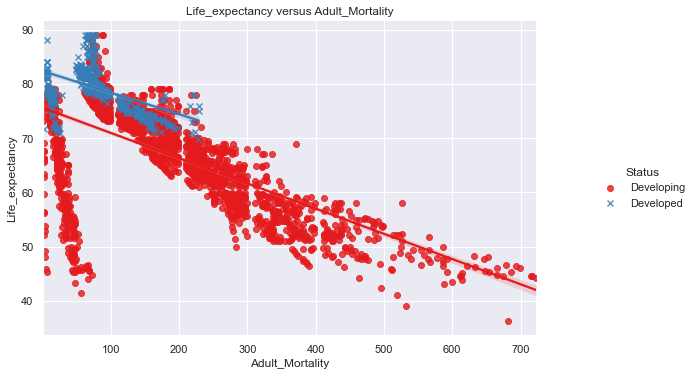

In [62]:
g= sns.lmplot(x="Adult_Mortality", y="Life_expectancy", 
           data=df1, hue="Status", markers=["o", "x"],palette="Set1")
g.fig.set_size_inches(10,5)
plt.title('Life_expectancy versus Adult_Mortality')
plt.show()

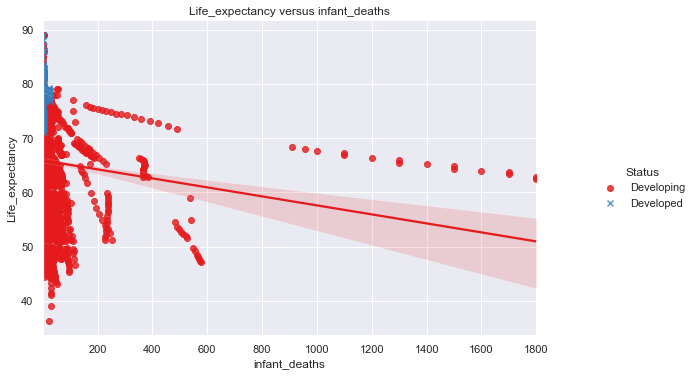

In [63]:
g= sns.lmplot(x="infant_deaths", y="Life_expectancy", 
           data=df1, hue="Status", markers=["o", "x"],palette="Set1")
g.fig.set_size_inches(10,5)
plt.title('Life_expectancy versus infant_deaths')
plt.show()

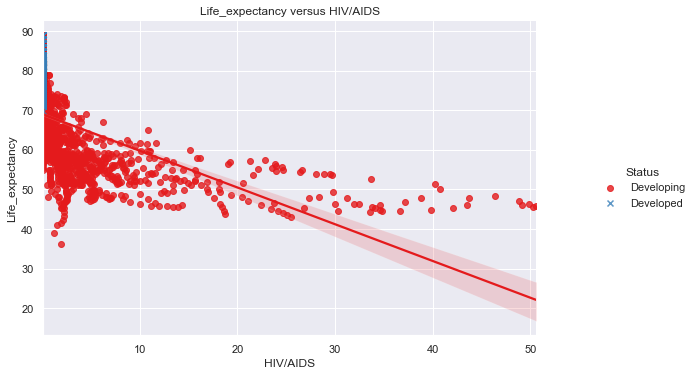

In [64]:
g= sns.lmplot(x="HIV/AIDS", y="Life_expectancy", 
           data=df1, hue="Status", markers=["o", "x"],palette="Set1")
g.fig.set_size_inches(10,5)
plt.title('Life_expectancy versus HIV/AIDS')
plt.show()

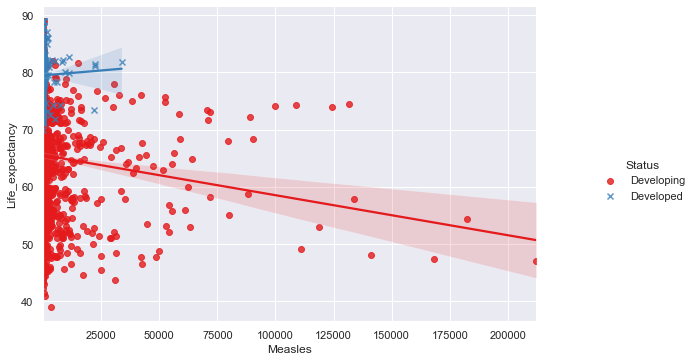

In [65]:
g= sns.lmplot(x="Measles", y="Life_expectancy", 
           data=df1, hue="Status", markers=["o", "x"],palette="Set1")
g.fig.set_size_inches(10,5)
plt.show()

Note: in general, mortality factors impact negatively life expectancy

### Social factors and life expectancy

In [66]:
#Social factors
#Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
#Number of years of Schooling(years)
#Average Body Mass Index of entire population
#Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
#Prevalence of thinness among children for Age 5 to 9(%)

In [67]:
Social_factors=['Alcohol','BMI','Schooling', 'thinness__1_19_years','thinness_5_9_years']

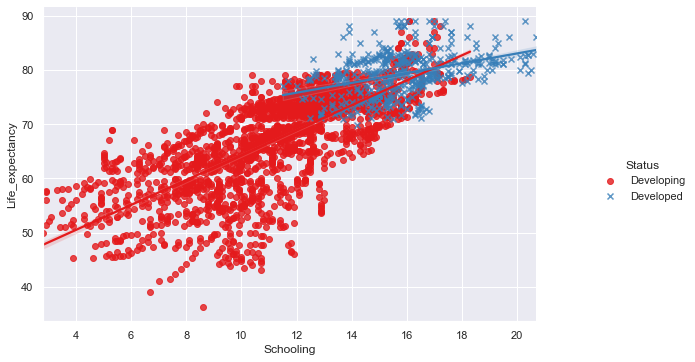

In [68]:
g= sns.lmplot(x="Schooling", y="Life_expectancy", 
           data=df1, hue="Status", markers=["o", "x"],palette="Set1")
g.fig.set_size_inches(10,5)
plt.show()

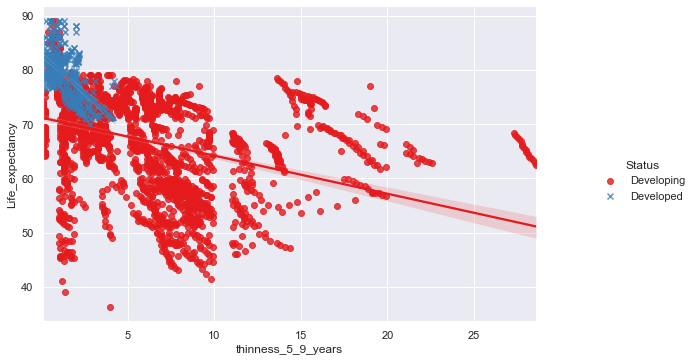

In [69]:
g= sns.lmplot(x="thinness_5_9_years", y="Life_expectancy", 
           data=df1, hue="Status", markers=["o", "x"],palette="Set1")
g.fig.set_size_inches(10,5)
plt.show()

Note: in this group of factors(Social factors), Schooling realing impact positively life expectancy in both countries.
Thinness has a negatif impact in life expectancy. 

### Economical factors and life expectancy

In [70]:
#Economical factors
#Gross Domestic Product per capita (in USD)
#General government expenditure on health as a percentage of total government expenditure (%)
#Expenditure on health as a percentage of Gross Domestic Product per capita(%)
#Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

In [71]:
Economical_factors=['percentage_expenditure','Total_expenditure','GDP','Income_composition_of_resources']

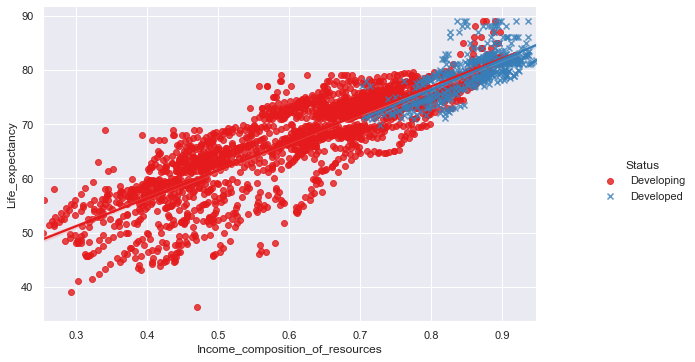

In [72]:
g= sns.lmplot(x="Income_composition_of_resources", y="Life_expectancy", 
           data=df1, hue="Status", markers=["o", "x"],palette="Set1")
g.fig.set_size_inches(10,5)
plt.show()

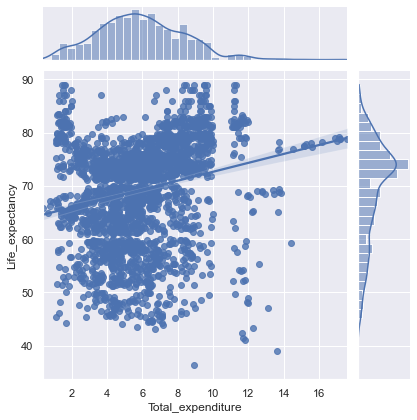

In [73]:
sns.jointplot(x="Total_expenditure", y="Life_expectancy", data=df1, kind="reg");

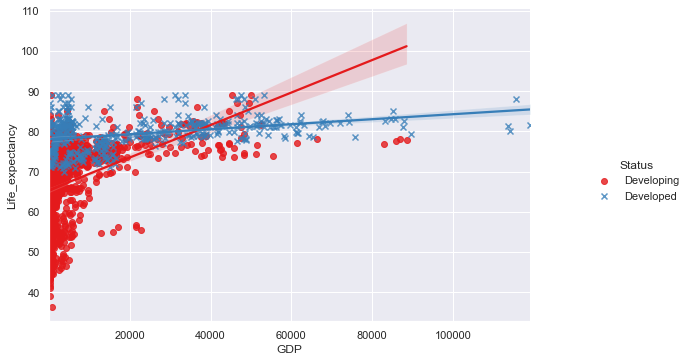

In [74]:
g= sns.lmplot(x="GDP", y="Life_expectancy", 
           data=df1, hue="Status", markers=["o", "x"],palette="Set1")
g.fig.set_size_inches(10,5)
plt.show()

Note: in the both develoed and developing country, Economical_factors has hight positive impact on life expectancy. 

#### Population and life_expectancy 

In [75]:
# log transformation of population to improve visualisation 
df1['population']= np.log(df1["Population"])

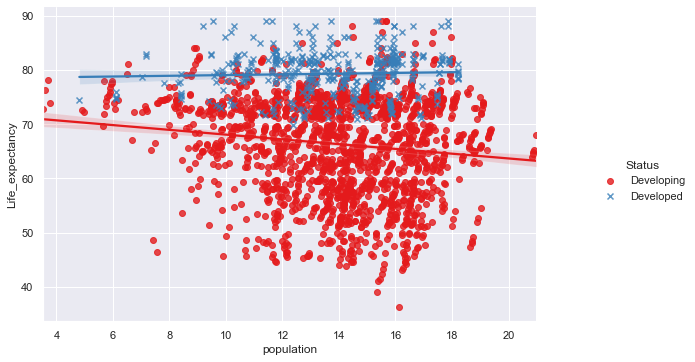

In [76]:
g= sns.lmplot(x='population', y="Life_expectancy", 
           data=df1, hue="Status", markers=["o", "x"],palette="Set1")
g.fig.set_size_inches(10,5)
plt.show()

Note: increase in population negatively impact life expectancy in developing countries, while in developed countries, life expectancy slily change with the increase in population. 

###  6. How was the life expectancy over one decate (2005 to 2015)

In [77]:
# selection of features of interest
df_ratio = df1[['Year','Status','Country','Life_expectancy']]
df_ratio.head()

,Year,Status,Country,Life_expectancy
0,2015,Developing,Afghanistan,65.0
1,2014,Developing,Afghanistan,59.9
2,2013,Developing,Afghanistan,59.9
3,2012,Developing,Afghanistan,59.5
4,2011,Developing,Afghanistan,59.2


In [78]:
dfg = df_ratio.groupby(by = ['Year', 'Country', 'Status']).mean()
dfg = dfg.reset_index()

In [79]:
dfg.head(5)

,Year,Country,Status,Life_expectancy
0,2000,Afghanistan,Developing,54.8
1,2000,Albania,Developing,72.6
2,2000,Algeria,Developing,71.3
3,2000,Angola,Developing,45.3
4,2000,Antigua and Barbuda,Developing,73.6


In [80]:
def create_life_expectancy_ratio(df):
    """ get the ratio of Life_expectancy over 1 decates 2005 and 2015"""
    yy2005 = float(df['Life_expectancy'][df['Year']== 2005])
    yy2015 = float(df['Life_expectancy'][df['Year']== 2015])
    ratio = [yy2015/yy2005]
    return(ratio)

In [81]:
Countries = df1.Country.unique()
life_expectancy_ratio = {}
for country in Countries:
    d = dfg[dfg['Country'] == country]
    ratio = np.round(create_life_expectancy_ratio(d),3)
    life_expectancy_ratio[country] = ratio
    
#print( life_expectancy_ratio)

In [82]:
df_ratio_2005_2015 = pd.DataFrame(life_expectancy_ratio)
df_ratio_2005_2015 = df_ratio_2005_2015.head().T
df_ratio_2005_2015 = df_ratio_2005_2015.reset_index()
df_ratio_2005_2015.head()

,index,0
0,Afghanistan,1.134
1,Albania,1.059
2,Algeria,1.037
3,Angola,1.105
4,Antigua and Barbuda,1.024


In [83]:
df_ratio_2005_2015.rename(columns={'index': 'country', 0: 'life_expectancy_ratio_2005_2015'}, inplace = True)

In [84]:
df_ratio_2005_2015.head()

,country,life_expectancy_ratio_2005_2015
0,Afghanistan,1.134
1,Albania,1.059
2,Algeria,1.037
3,Angola,1.105
4,Antigua and Barbuda,1.024


In [85]:
# get the top 30 countries with high ratio over one decate
Top_30_Ctr =  df_ratio_2005_2015.sort_values(by = 'life_expectancy_ratio_2005_2015', ascending = False).head(30)

In [86]:
b = Top_30_Ctr['country']
p = Top_30_Ctr['life_expectancy_ratio_2005_2015']

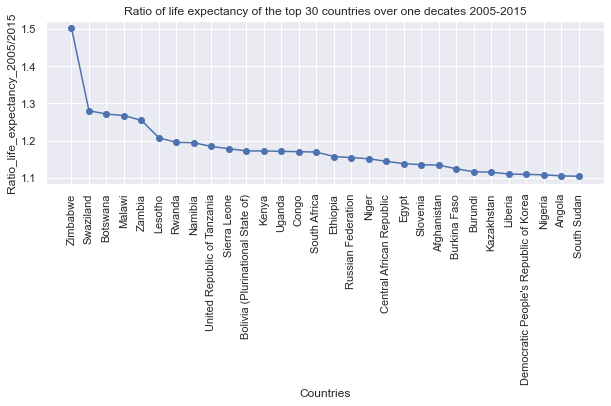

In [87]:
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(b, p, marker = 'o')
ax.set_xlabel('Countries')
ax.set_ylabel('Ratio_life_expectancy_2005/2015')
ax.set_xticklabels(Top_30_Ctr['country'], rotation=90)
ax.set_title('Ratio of life expectancy of the top 30 countries over one decates 2005-2015')
plt.show()

Note: We found that Excep Switzerland ( 2nd position) Slovenia(20th position),  almost all of the countries (the top 30) which high ratio of life expectancy over a decade of 2005 to 2015 are from developing countries.  

#### Save dataset

In [88]:
#data_Zero_NAN # Raw data -- replace 0 with NaN---- delete 10 row 
datapath = '../data'
save_file(df1, 'life_exp_clean.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "../data\life_exp_clean.csv"
